## Library Import

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import datetime as dt

## Data Import

In [2]:
NUM_DAYS = 10000     
INTERVAL = '1d'     
symbol = 'SUPRAJIT.NS'   

In [3]:
start = (dt.date.today() - dt.timedelta( NUM_DAYS ) )
end = dt.datetime.today()

In [4]:
data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-02-18,8.20,8.400,7.925,7.970,6.406082,183580
2005-02-21,8.28,8.475,7.810,7.875,6.329724,136590
2005-02-22,7.60,7.995,7.600,7.685,6.177005,41830
2005-02-23,7.70,7.785,7.500,7.610,6.116723,42290
2005-02-24,7.00,8.390,6.105,7.985,6.418139,242070


In [5]:
data = yf.download(symbol)

[*********************100%***********************]  1 of 1 completed


In [6]:
ticker = yf.Ticker(symbol)
data = ticker.history(period="15y")
data['Close']

Date
2006-07-17     14.677617
2006-07-18     14.221489
2006-07-19     13.500640
2006-07-20     13.749068
2006-07-21     13.463984
                 ...    
2021-07-12    298.250000
2021-07-13    294.549988
2021-07-14    310.299988
2021-07-15    314.700012
2021-07-16    316.649994
Name: Close, Length: 3669, dtype: float64

## Data Processing

<AxesSubplot:xlabel='Date'>

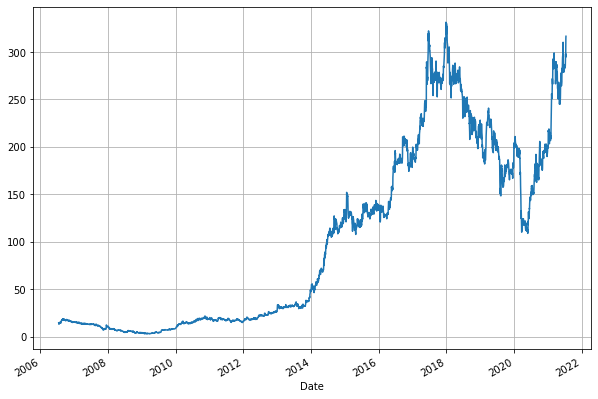

In [7]:
data['Close'].plot(figsize=(10,7), grid=True)

In [8]:
data_pc = data.Close.pct_change()
data_pc.head()

Date
2006-07-17         NaN
2006-07-18   -0.031076
2006-07-19   -0.050687
2006-07-20    0.018401
2006-07-21   -0.020735
Name: Close, dtype: float64

## Stratergy

### Used Stratergy :
   Following conditions are applied
   1. Swing of 20 Day's
   2. Simple Moving Avarages of 10,20,50 and 200 are considered.
   3. Volume change of at least 50% verified.

In [9]:
data['overnight_returns'] = (data['Open']-data['Close'].shift(1))/data['Close'].shift(1)
data['swing_returns'] = (data['Close']-data['Open'].shift(3))/data['Open'].shift(3)
data['ma10'] = data['Close'].rolling(window=10).mean()
data['ma20'] = data['Close'].rolling(window=20).mean()
data['ma50'] = data['Close'].rolling(window=50).mean()
data['ma200'] = data['Close'].rolling(window=200).mean()
data['overnight_volume'] = (data['Volume'].shift(1)-data['Volume'].shift(2))/data['Volume'].shift(2)
data.dropna(inplace=True)
del (data['Dividends'])
del (data['Stock Splits'])
data.head()

,Open,High,Low,Close,Volume,overnight_returns,swing_returns,ma10,ma20,ma50,ma200,overnight_volume
Date,,,,,,,,,,,,
2007-05-09,13.224414,13.876960,13.216153,13.769580,13920,-0.005590,-0.013025,13.659719,13.700400,13.899757,15.591930,-0.476593
2007-05-10,13.876959,13.876959,13.298754,13.315274,4100,0.007798,-0.023030,13.660545,13.678717,13.868864,15.585119,0.729193
2007-05-11,13.381355,13.629157,13.133551,13.253323,4340,0.004963,-0.006501,13.643199,13.651666,13.843175,15.580278,-0.705460
2007-05-14,13.678718,13.678718,13.678718,13.678718,760,0.032097,0.034353,13.648155,13.667979,13.826820,15.581168,0.058537
2007-05-15,13.298752,13.298752,13.298752,13.298752,800,-0.027778,-0.041667,13.569684,13.665088,13.800471,15.578917,-0.824885


In [10]:
cond_1 = data.overnight_returns > 0.01
cond_2 = data.ma10 > data.ma20
cond_3 = data.ma10 > data.ma200
cond_4 = data.overnight_volume > 0.8
cond_5 = data.ma10 > data.ma50
cond_6 = data.overnight_returns < 0.05

In [11]:
data['signal'] = np.where(cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6, 1, 0)

data.head()

,Open,High,Low,Close,Volume,overnight_returns,swing_returns,ma10,ma20,ma50,ma200,overnight_volume,signal
Date,,,,,,,,,,,,,
2007-05-09,13.224414,13.876960,13.216153,13.769580,13920,-0.005590,-0.013025,13.659719,13.700400,13.899757,15.591930,-0.476593,0
2007-05-10,13.876959,13.876959,13.298754,13.315274,4100,0.007798,-0.023030,13.660545,13.678717,13.868864,15.585119,0.729193,0
2007-05-11,13.381355,13.629157,13.133551,13.253323,4340,0.004963,-0.006501,13.643199,13.651666,13.843175,15.580278,-0.705460,0
2007-05-14,13.678718,13.678718,13.678718,13.678718,760,0.032097,0.034353,13.648155,13.667979,13.826820,15.581168,0.058537,0
2007-05-15,13.298752,13.298752,13.298752,13.298752,800,-0.027778,-0.041667,13.569684,13.665088,13.800471,15.578917,-0.824885,0


In [12]:
data.loc[data.signal==1].head()

,Open,High,Low,Close,Volume,overnight_returns,swing_returns,ma10,ma20,ma50,ma200,overnight_volume,signal
Date,,,,,,,,,,,,,
2009-06-11,4.887058,4.887058,4.575297,4.609001,7420,0.043166,-0.014415,4.796900,4.507258,3.998119,4.417901,3.962264,1
2009-06-15,4.634279,4.634279,4.225620,4.381500,15700,0.010101,-0.054545,4.701266,4.591307,4.044378,4.411034,2.838275,1
2009-07-27,4.887059,5.127198,4.828077,5.038726,161950,0.019332,0.077478,4.675567,4.587726,4.502160,4.244178,1.548453,1
2009-07-29,5.906600,6.361602,5.738080,6.235212,726140,0.018895,0.344232,5.001230,4.731599,4.572180,4.246727,2.317505,1
2009-08-04,7.280030,7.414845,7.077807,7.162066,249840,0.012302,0.148649,5.886377,5.190393,4.778279,4.263221,2.340131,1


## Stratergy Back-Testing

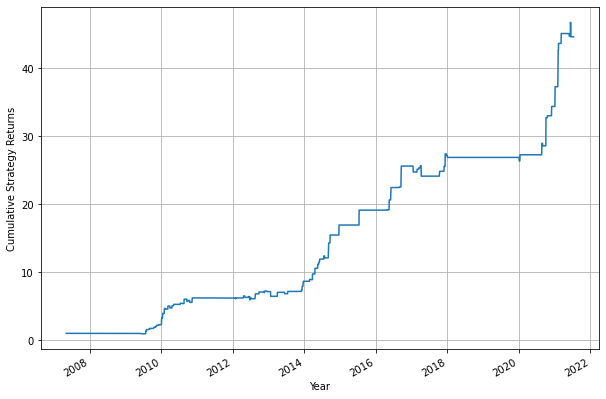

In [13]:
strategy_returns = data.signal * data.swing_returns
(strategy_returns+1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

In [14]:
import pyfolio as pf

C:\Users\ASUS\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## Stratergy Results

C:\Users\ASUS\anaconda3\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2007-05-09
End date,2021-07-16
Total months,165
,Backtest
Annual return,31.8%
Cumulative returns,4360.2%
Annual volatility,21.5%
Sharpe ratio,1.38
Calmar ratio,2.97
Stability,0.89
Max drawdown,-10.7%


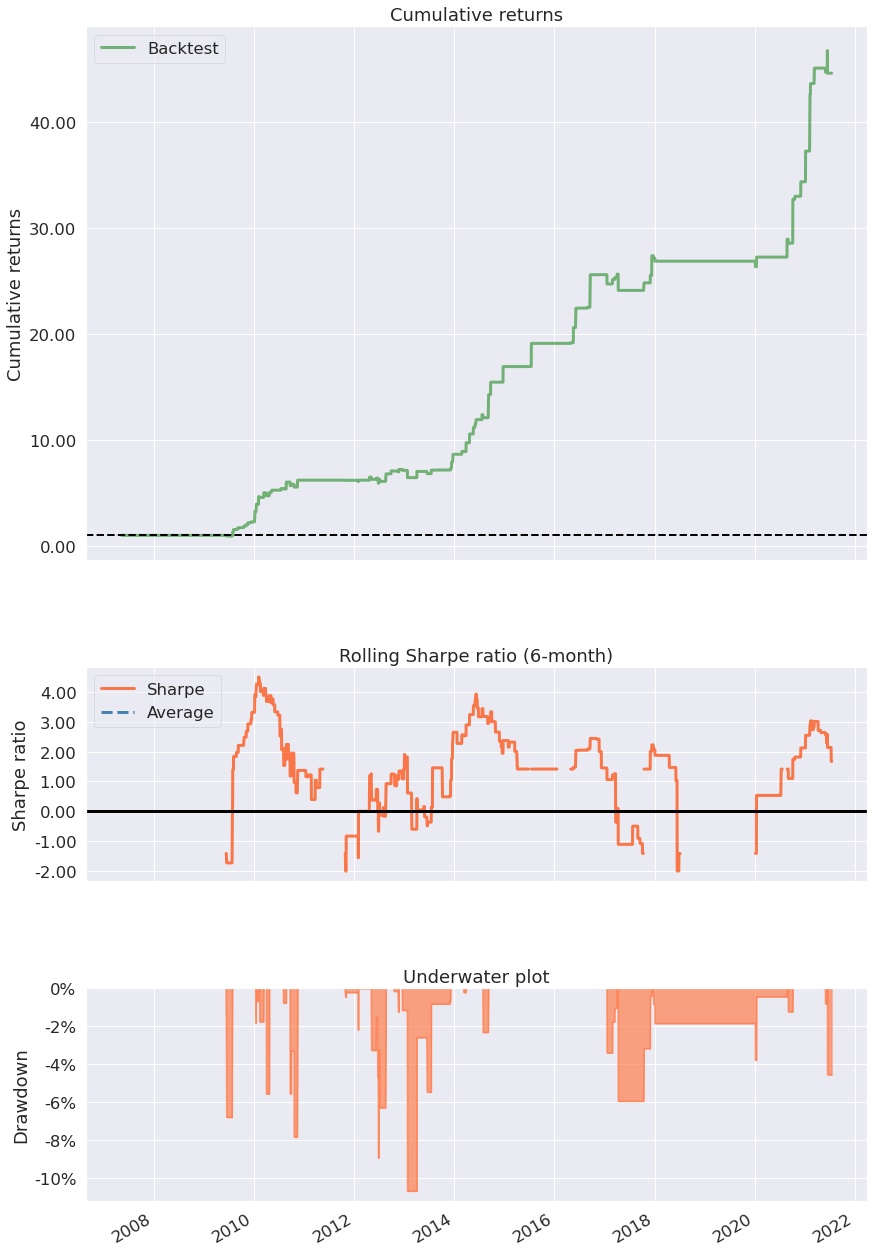

In [15]:
pf.create_simple_tear_sheet(strategy_returns)

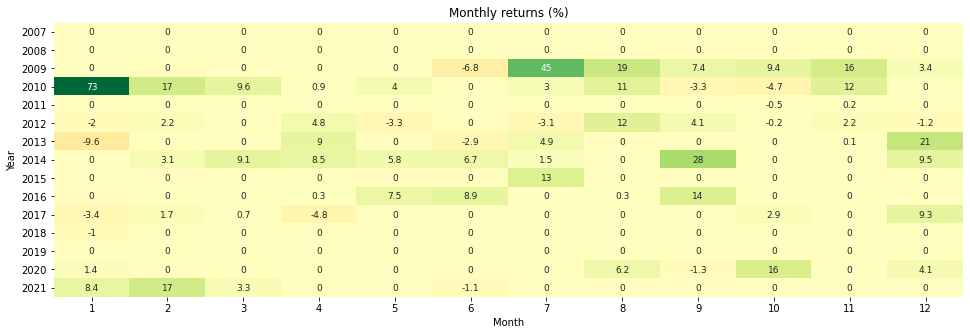

In [16]:
fig = plt.figure(1)
pf.plot_monthly_returns_heatmap(strategy_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

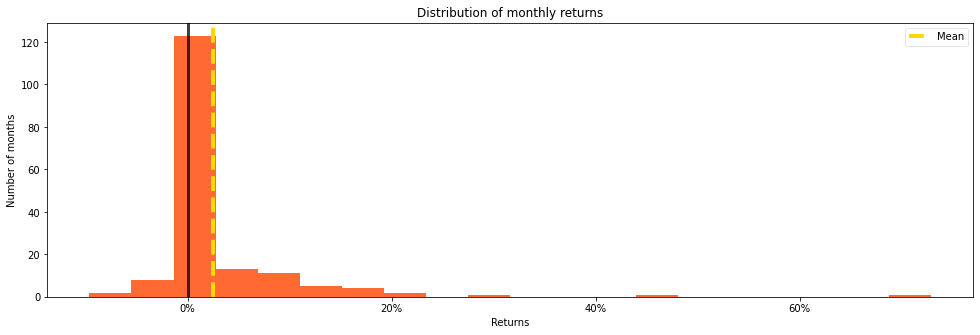

In [17]:
fig = plt.figure(1)
pf.plot_monthly_returns_dist(strategy_returns)
plt.tight_layout()
fig.set_size_inches(15,5)


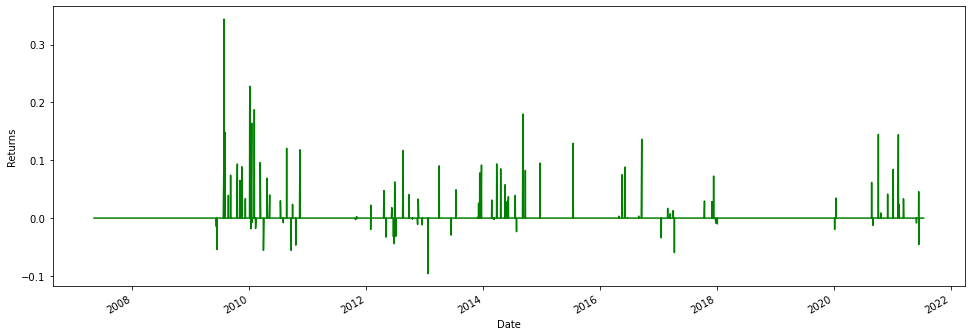

In [18]:
fig = plt.figure(1)
pf.plotting.plot_returns(strategy_returns)
plt.tight_layout()
fig.set_size_inches(15,5)
